In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Shape

In [4]:
data.shape

(10000, 14)

## columns

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
def cat_bar_analysis(data, columns):
    size = len(columns)
    rows = (size + 1) // 2
    cols = min(2, size)

    plt.figure(figsize=(8 * cols, 6 * rows))

    for j, column in enumerate(columns):
        norm_count = data[column].value_counts(normalize=True).sort_index()
        n_unique = data[column].nunique()
        if size > 2:
            plt.subplot(rows, cols, j + 1)
        else:
            plt.subplot(1, size, j + 1)

        sns.barplot(y=norm_count, x=norm_count.index)
        plt.ylabel("{}".format(column))
        plt.title(f"{column} univariate analysis")
        for idx, value in enumerate(norm_count):
            x = value * 100
            plt.text(idx, value, f"{x:.1f}%", ha="center", va="bottom")
        plt.xlabel("percentage", fontsize=15)
        plt.tight_layout()

    plt.show()

In [9]:

def cat_pie_analysis(data, columns):
    size = len(columns)
    rows = (size + 1) // 2
    cols = min(2, size)

    plt.figure(figsize=(8 * cols, 6 * rows))

    for j, column in enumerate(columns):
        norm_count = data[column].value_counts(normalize=True).sort_index()
        n_unique = data[column].nunique()
        if size > 2:
            plt.subplot(rows, cols, j + 1)
        else:
            plt.subplot(1, size, j + 1)

        plt.pie(norm_count, labels=norm_count.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.title(f"{column} univariate analysis")
        plt.tight_layout()

        # Adding legend outside the pie chart
        plt.legend( bbox_to_anchor=(1, 1))

    plt.show()


In [10]:
# cat = data.select_dtypes(include="object").columns
cat = [x for x in data.columns if data[x].dtype == "O"]
cat

['Surname', 'Geography', 'Gender']

In [11]:
data["Surname"].nunique()

2932

In [12]:
data.drop("Surname", axis=1, inplace=True)

In [13]:
for i in ["Exited", "IsActiveMember", "HasCrCard", "NumOfProducts", "Tenure"]:
    data[i] = pd.Categorical(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  object  
 4   Gender           10000 non-null  object  
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  category
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4), object(2)
memory usage: 674.9+ KB


# Gender and Geography

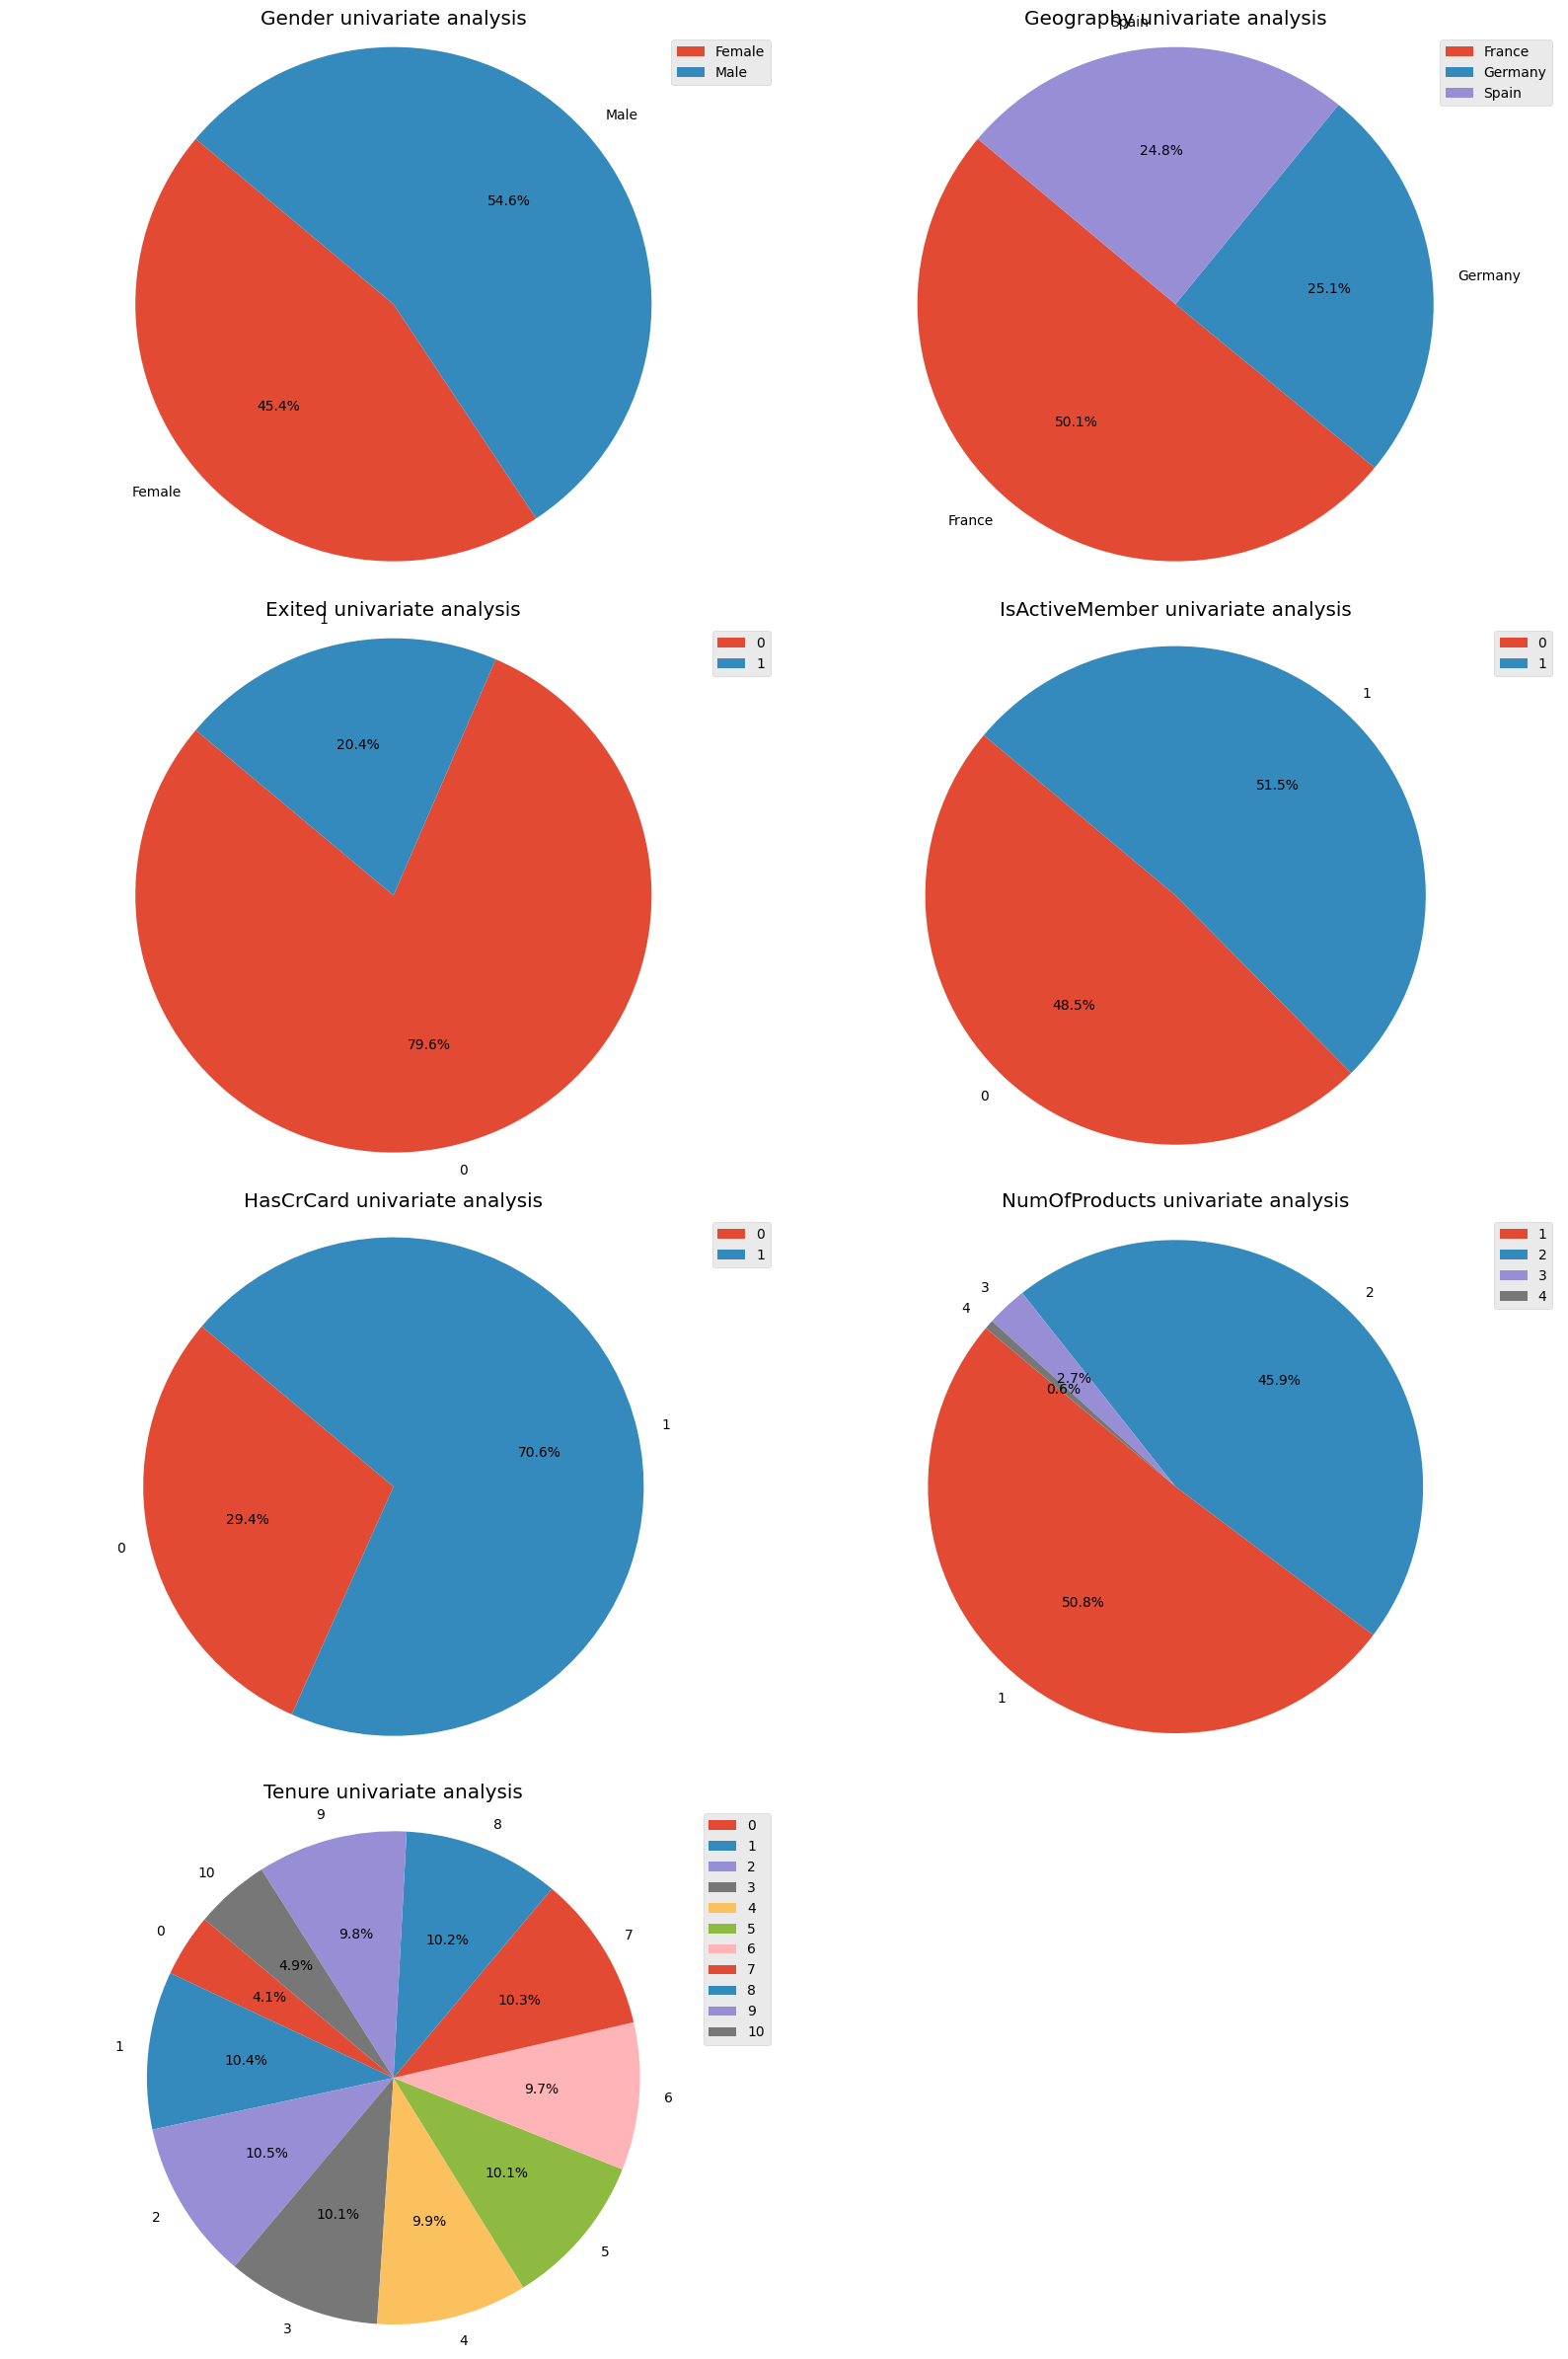

In [14]:
cat_pie_analysis(
    data,
    [
        "Gender",
        "Geography",
        "Exited",
        "IsActiveMember",
        "HasCrCard",
        "NumOfProducts",
        "Tenure",
    ],
)

In [15]:
def univariate_analysis(data, i):
    percentiles = [25, 50, 75]
    statistics = {
        "min": "min",
        "max": "max",
        "mean": "mean",
        "median": "median",
        "std": "std",
        "skew": "skew",
        "kurt": "kurtosis",
    }
    for p in percentiles:
        statistics[f"{p}_percentile"] = lambda x, p=p: x.quantile(p / 100)
        result = data[i].agg(statistics)
    return result

In [16]:
def num_analysis(data, columns):
    size = len(columns)
    rows = (size + 1) // 2
    cols = min(2, size)
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8 * rows))
    for idx, column in enumerate(columns):
        if size > 2:
            ax = axs[idx // cols, idx % cols]
        else:
            if size == 1:
                ax = axs
            else:
                ax = axs[idx]
        sns.histplot(
            data[column],
            kde=True,
            stat="density",
            kde_kws=dict(cut=3),
            alpha=0.4,
            ax=ax,
        )
        ax.set_xlabel("{}".format(column), fontsize=15)
        ax.set_ylabel("density", fontsize=15)
        ax.set_title("{}".format(univariate_analysis(data, column)))
    for i in range(size, rows * cols):
        if size > 2:
            fig.delaxes(axs[i // cols, i % cols])
        else:
            fig.delaxes(axs)
    plt.tight_layout()
    plt.show()

In [17]:
[i for i in data.columns if i not in cat]

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

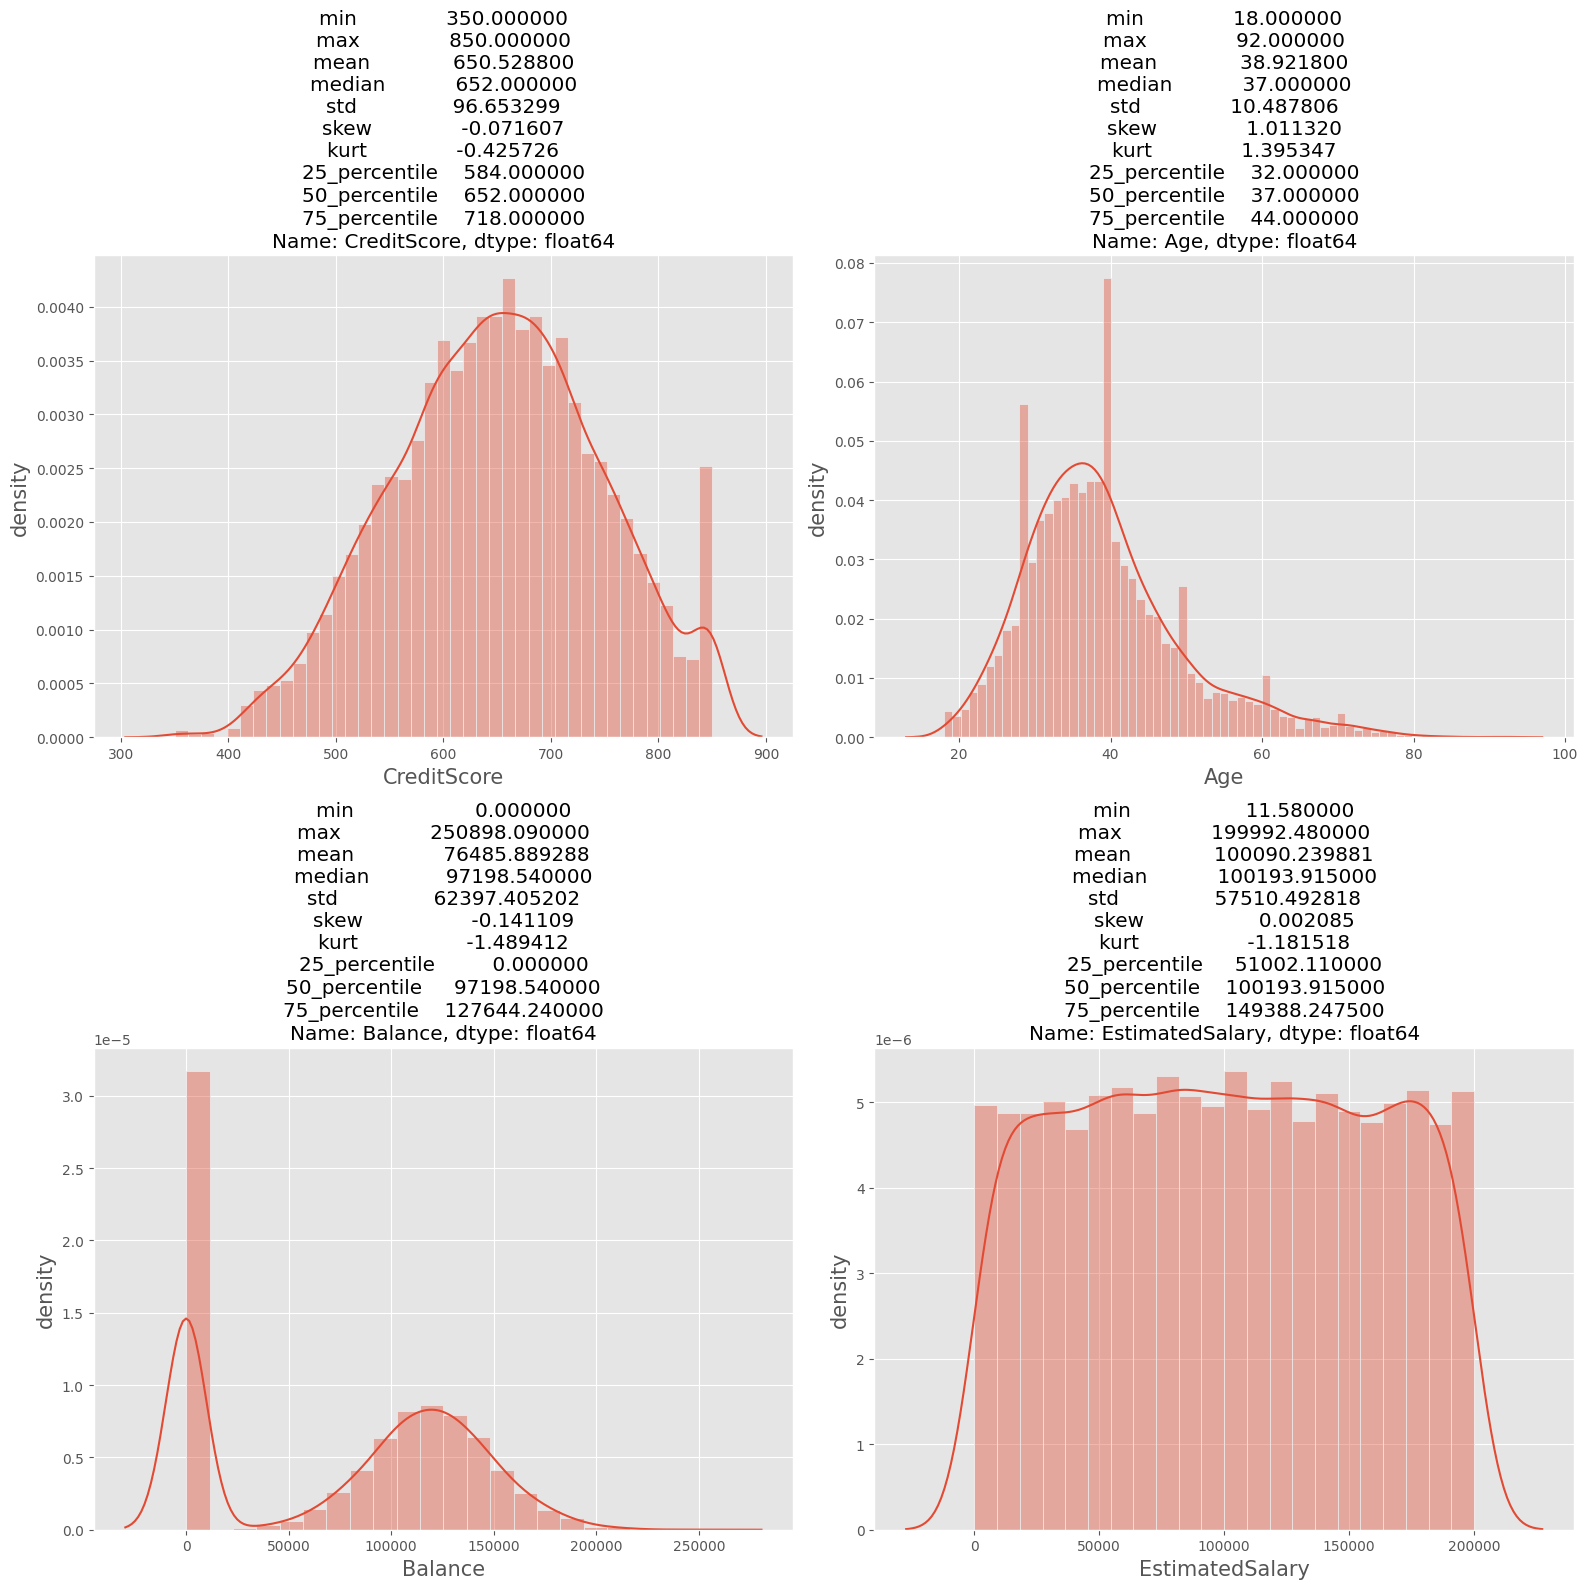

In [18]:
num_analysis(data, ["CreditScore", "Age", "Balance", "EstimatedSalary"])